# <center>“从炼丹到爆炉”——基于MNIST的手写数字识别</center>

### <center>—— 1951976 李林飞</center>

## 一、炼丹初期——基于Tensorflow手写数字识别

### 1. MNIST简介

MNIST数据库是一个大型的手写数字数据库，MNIST 数据集来自美国国家标准与技术研究所(NIST, National Institute of Standards and Technology)。数据库分为训练集和测试集两部分，训练集(training set)由来自250个不同人手写的数字构成, 其中50%是高中学生,50%来自人口普查局(the Census Bureau)的工作人员。测试集(test set)也是同样比例的手写数字数据。  

1998年，**Yan LeCun** 等人发表了论文《Gradient-Based Learning Applied to Document Recognition》，首次提出了LeNet-5 网络，利用上述数据集实现了手写字体的识别。

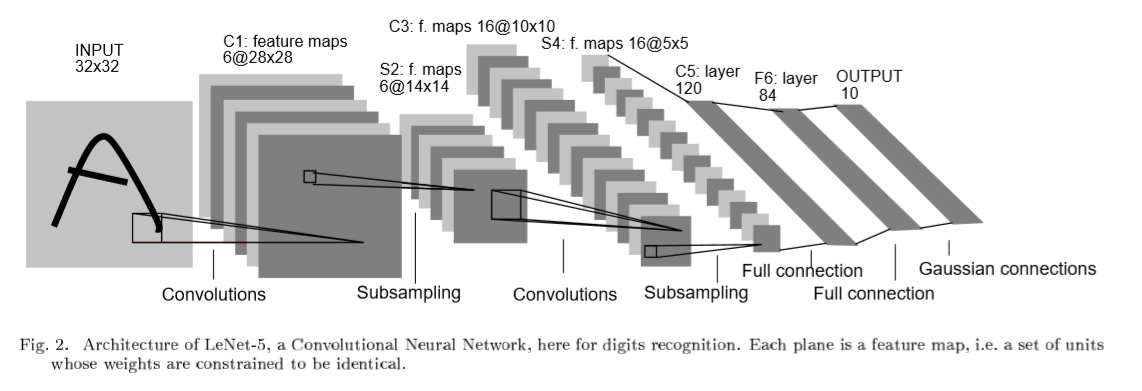


Mnist数据集官网：http://yann.lecun.com/exdb/mnist/

该数据集自1998年起，被广泛地应用于机器学习和深度学习领域，用来测试算法的效果，例如线性分类器（Linear Classifiers）、K-近邻算法（K-Nearest Neighbors）、支持向量机（SVMs）、神经网络（Neural Nets）、卷积神经网络（Convolutional nets）等。

### 2. 环境配置 
参考：https://www.tensorflow.org/guide/gpu

In [1]:
#不显示程序运行过程中的警告
import warnings
warnings.filterwarnings('ignore')

### 2.1 使用GPU环境[可选]

In [ ]:
# 查看可用GPU设备
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
# 确认 TensorFlow 使用的是 GPU
# tf.config.experimental.list_physical_devices('GPU')

### 2.2 导入相关库

In [2]:
#“Numeric Python”一个由多维数组对象和用于处理数组的例程集合组成的库
import numpy as np  

# 激活matplotlib 
%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt

# 随机数
from random import *

# 机器学习框架：Apache Singa | Amazon Machine Learning（AML）| Azure ML Studio 
#               Caffe | H2O | Massive Online Analysis (MOA) | MLlib (Spark)
#              Mlpack | Pattern | Scikit-Learn | Shogu | TensorFlow 
#              Theano | Torch | Veles
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

### 3. MNIST数据集

#### 3.1 数据可视化

In [4]:
# 读入数据
warnings.filterwarnings('ignore')
mnist = read_data_sets('./Datasets')

Extracting ./Datasets\train-images-idx3-ubyte.gz
Extracting ./Datasets\train-labels-idx1-ubyte.gz
Extracting ./Datasets\t10k-images-idx3-ubyte.gz
Extracting ./Datasets\t10k-labels-idx1-ubyte.gz


- train-images-idx3-ubyte.gz —— 训练图片集
- train-labels-idx1-ubyte.gz —— 训练标签集
- t10k-images-idx3-ubyte.gz  —— 测试图片集
- t10k-labels-idx1-ubyte.gz  —— 测试标签集

MNIST数据集使用了一种独创的、非常简单的数据格式来存储多维数组的。数据格式就叫IDX，如果数组是3个维度，就叫ID3，如果数组是1个维度，就叫ID1。

In [5]:
# 查看数据类型 
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

- 数据分类

In [6]:
# 训练集
train_images = mnist.train.images
train_labels = mnist.train.labels

# 验证集
validation_images = mnist.validation.images
validation_labels = mnist.validation.labels

# 测试集
test_images = mnist.test.images
test_labels = mnist.test.labels

In [7]:
# 打印数据集中的数据个数
# 训练集
print(mnist.train.num_examples)
# 验证集
print(mnist.validation.num_examples)
# 测试集
print(mnist.test.num_examples)

55000
5000
10000


- 55000条训练数据,5000条验证数据,和10000条测试数据

In [8]:
# 取出一条数据,打印数据的shape
im = mnist.train.images[1]
print(im.shape)

(784,)


- 每条数据是一个长度为784的一维矩阵,这是因为数据经过标准化处理了,每条数据为手写图片的784个像素点

(28, 28)


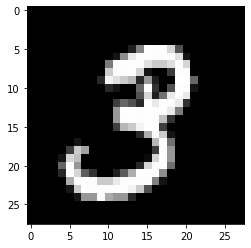

In [9]:
# 查看图片
im = im.reshape(28, 28)
print(im.shape)
# plt.imshow(im)
# plt.imshow(im, cmap='Greys')
plt.imshow(im, cmap='gray')
plt.show()

In [10]:
# 查看标签
print(mnist.train.labels[1])

3


- 计算机眼中的图片(28*28=784)

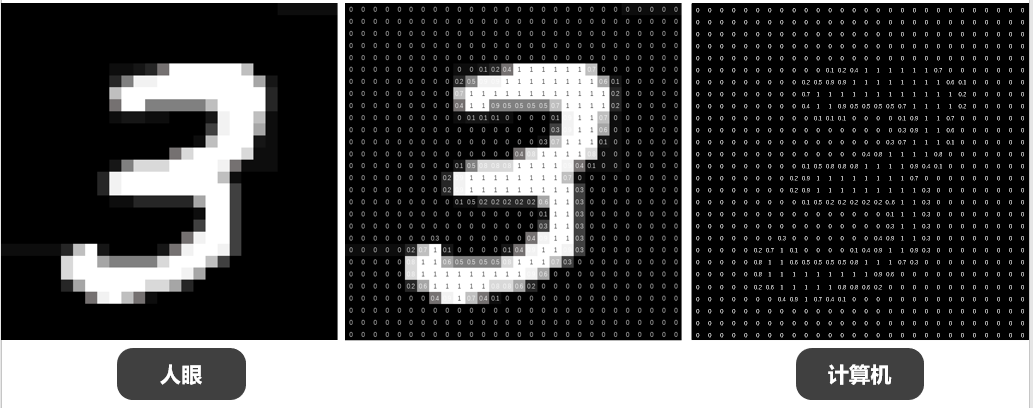

In [12]:
# 查看one-hot编码
from tensorflow.examples.tutorials.mnist import input_data
mnist_test = input_data.read_data_sets("./Datasets/", one_hot=True)
print(mnist_test.train.labels[1])

Extracting ./Datasets/train-images-idx3-ubyte.gz
Extracting ./Datasets/train-labels-idx1-ubyte.gz
Extracting ./Datasets/t10k-images-idx3-ubyte.gz
Extracting ./Datasets/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


#### one-hot编码
这个向量的表示为一项属性的特征向量，也就是同一时间只有一个激活点（不为0），这个向量只有一个特征是不为0的，其他都是0。特别稀疏，这个稀疏矩阵用来组成一个多特征的训练集样本

比如0-9一共九个数字，可用长度为10的向量表示,如0表示为{1，0，0，0，0，0，0，0，0，0}，1表示为{0，1，0，0，0，0，0，0，0，0}

目的在于在计算**欧氏距离**时，独热（one-hot)编码可保证每个特征的比重一致

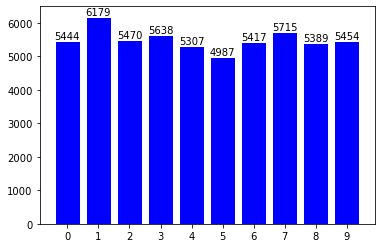

In [13]:
# 统计可视化
X = []
Y = []

for i in range(10):
    x = i
    y = np.sum(train_labels == i)
    X.append(x)
    Y.append(y)
    plt.text(x, y, '%s' % y, ha='center', va= 'bottom')

plt.bar(X, Y, facecolor='blue', edgecolor='white')
plt.xticks(X)
plt.show()

### 4 训练数据预处理

#### 4.1 自选数据

- next_batch():批量随机读取数据
- 选60000条训练数据，10000条测试数据

In [14]:
x_train, y_train = mnist.train.next_batch(60000)
x_test, y_test = mnist.test.next_batch(10000)

- 查看类型
- shape: numpy函数，获取矩阵形状，单独数值，返回为空

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [16]:
x_train[0].shape

(784,)

- reshape:改变数组的形状

In [17]:
Xinput_,yinput_ = x_train, y_train

Xinput_ = x_train.reshape(60000,784)
yinput_ = y_train.reshape(60000,)

X = Xinput_
y = yinput_

#### 4.2 准备训练集和测试集

因为原始的数据集比较庞大，所以从简单地只识别数字1和2。

- 筛选数字1和2对应的训练数据（输入）和标签数据（输出）

In [18]:
X_train = X[np.any([y == 1,y == 2], axis = 0)]
y_train = y[np.any([y == 1,y == 2], axis = 0)]

- 查看挑选出来的训练集的大小

In [19]:
print(X_train.shape)
print(y_train.shape)

(12732, 784)
(12732,)


- 查看一下训练集中数字1和2个数字的数量

In [20]:
print("number of 1:", np.count_nonzero(y_train == 1))
print("number of 2:", np.count_nonzero(y_train == 2))

number of 1: 6764
number of 2: 5968


- 数据标准化
- 同趋化处理：解决不同性质数据问题
- 无量纲化处理：解决数据的可比性

In [21]:
X_train_normalised = X_train

- 训练过程中数据特征是按行分布，即每一个数字图像就是1列。因此需要对原来的图像进行转置

In [22]:
# 训练集
X_train_tr = X_train_normalised.transpose() # 转置函数
y_train_tr = y_train.reshape(1,y_train.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)

n_dim = X_train_tr.shape[0]
dim_train = X_train_tr.shape[1]

print(n_dim)
print("训练集总共有", dim_train, "个样本数据.")

(784, 12732)
(1, 12732)
784
训练集总共有 12732 个样本数据.


#### 4.3 二分类变量

因为我们识别的是数字1和2，而分类目标是按照0和1来分类的。需要对标签输出数据进行调整。即  
表示数字1的所有手写数字图像都具有标签0  
表示数字2的所有手写数字图像都具有标签1  

In [23]:
# 设置分类变量
y_train_shifted = y_train_tr - 1

- 查看分类情况

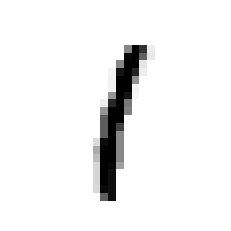

[0]


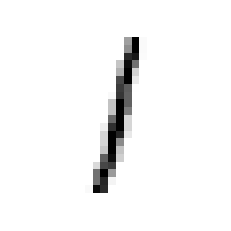

[0]


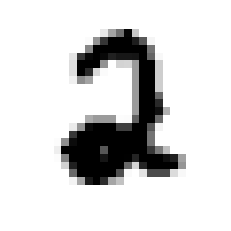

[1]


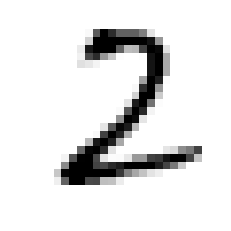

[1]


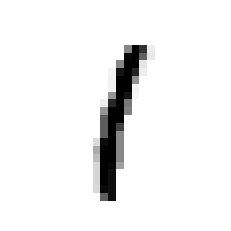

[0]


In [33]:
# 打印图片
def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
# 打印分类情况
plot_digit(X_train_tr[:,1005])
print(y_train_shifted[:,1005])
plot_digit(X_train_tr[:,6666])
print(y_train_shifted[:,6666])
plot_digit(X_train_tr[:,100])
print(y_train_shifted[:,100])
plot_digit(X_train_tr[:,8888])
print(y_train_shifted[:,8888])

Xtrain = X_train_tr
ytrain = y_train_shifted

plot_digit(Xtrain[:,1005])
print(ytrain[:,1005])

- 测试转换

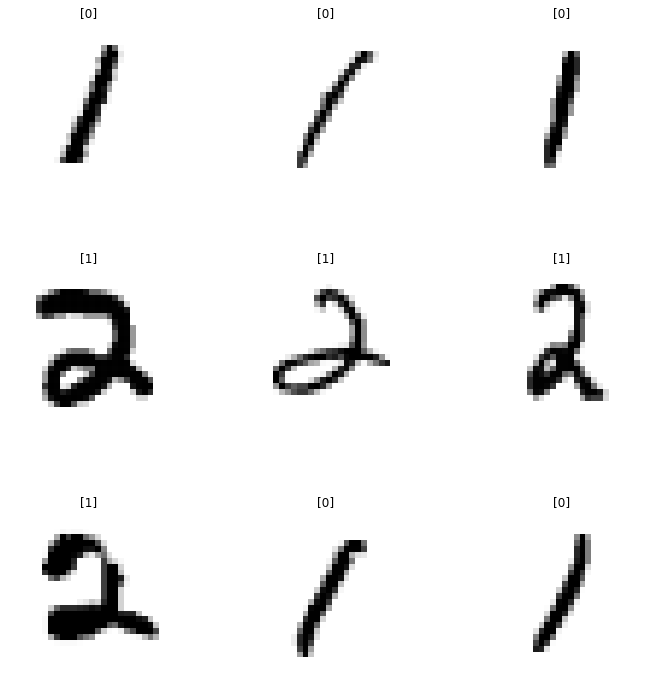

In [35]:
f = plt.figure(figsize=(12,12));
count = 1
#随机采样9个数字进行显示
for i in sample(range(12000), 9):
    #randint(1, 12000),randint(1, 12000),randint(1, 12000),randint(1, 12000),randint(1, 12000),randint(1, 12000)]:
    plt.subplot(3,3,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.5)
    plt.title(ytrain[:,i])
    some_digit_image = Xtrain[:,i].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

### 5. 基于Tensorflow进行手写数字识别

In [36]:
import tensorflow as tf

In [37]:
print(Xtrain.shape)
print(ytrain.shape)

(784, 12732)
(1, 12732)


#### 5.1 定义tensorflow计算图

- tf.Graph:定义了计算。它不计算任何值，它不包含任何值，它是代码中定义的指定操作。
- tf.Session:允许执行Graph或Graph的一部分。 它分配资源（在一台或多台机器上），并保存中间结果和变量的实际值。

##### 回归模型

- 占位符(placeholder)

In [38]:
# 清除默认图形堆栈并重置全局默认图形
# 重置计算图，若无：每在jupyter notebook上运行一次上述程序，就会在图上新增一个节点。
tf.reset_default_graph()

# tf.placeholder( dtype,shape=None,name=None)
# dtype:数据类型；shape:数据形状；namme:数据名称
# placeholder()函数是在神经网络构建graph的时候在模型中的占位，
# 此时并没有把要输入的数据传入模型，它只会分配必要的内存。
# 等建立session，在会话中，运行模型的时候通过feed_dict()函数向占位符喂入数据。
X = tf.placeholder(tf.float32, [n_dim, None])  # image 784
Y = tf.placeholder(tf.float32, [1, None])      # label 二分类
learning_rate = tf.placeholder(tf.float32, shape=())# 学习率

# tensorflow中进行优化的参数必须定义成tf.Variable类型
# tf.Variable(initializer,name),initializer是初始化参数 —— 计算图中一个值
# 初始化零向量
W = tf.Variable(tf.zeros([1, n_dim]))  # 权重
b = tf.Variable(tf.zeros(1))           # 偏移量

init = tf.global_variables_initializer()

- 激活函数：$y = 1/(1+e^{-x})$
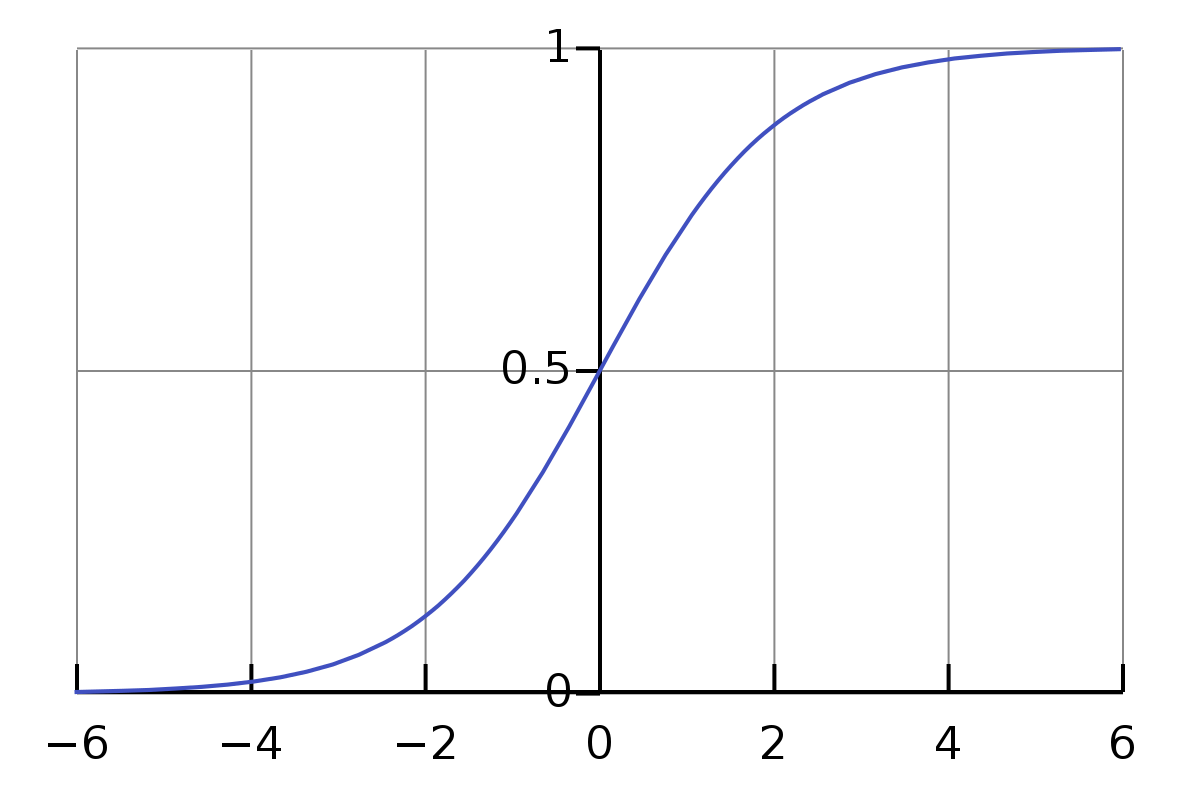

- 逻辑回归

$y = sigmoid(W^T*X + b)$ —— W：权重，b：偏移量

In [39]:
#定义神经网络模型
y_ = tf.sigmoid(tf.matmul(W,X)+b)  # W*X+b

# y = tf.nn.softmax(tf.matmul(x,W) + b)
# cross_entropy = -tf.reduce_sum(y_*tf.log(y))  # 交叉熵

##### 训练模型

- 漂亮的损失函数：交叉熵(cross-entropy)

$H_{y'}(y) = - \sum\limits_iy'_ilog(y_i)$ ——y 是我们预测的概率分布, y' 是实际的分布

- 两个变量

- 损失函数（熵）为 $J=-(ylog\hat{y}+(1-y)log(1-\hat{y})$

In [40]:
#定义损失函数计算节点，此处为熵
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_)) # 计算cost平均值
# tf.reduce_mean 函数用于计算张量tensor沿着指定的数轴（tensor的某一维度）
# 上的的平均值，主要用作降维或者计算tensor（图像）的平均值。
# reduce_mean(input_tensor,axis=None,keep_dims=False,name=None,reduction_indices=None)

##### 模型图

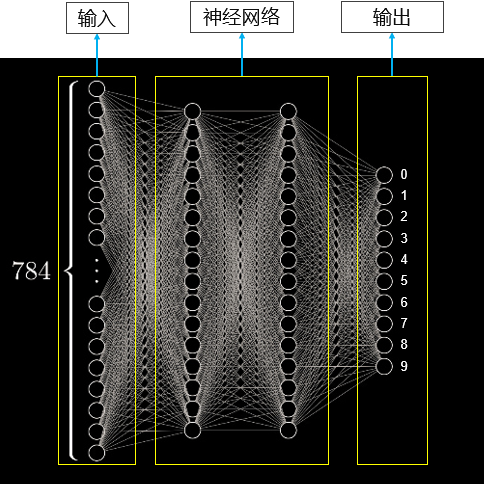

##### 反向传播算法(backpropagation algorithm)

- 因为TensorFlow拥有一张描述你各个计算单元的图，它可以自动地使用反向传播算法(backpropagation algorithm)来有效地确定你的变量是如何影响你想要最小化的那个成本值的。然后，TensorFlow会用你选择的优化算法来不断地修改变量以降低成本

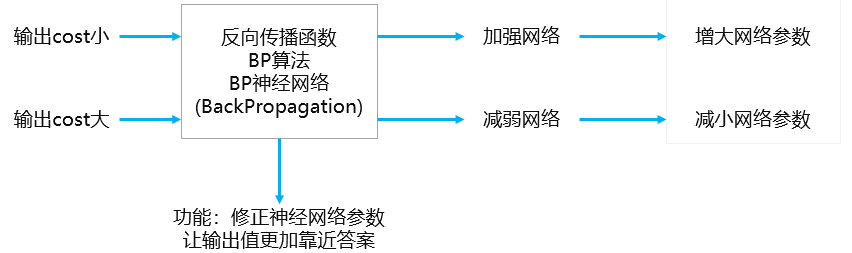

In [41]:
# 定义训练节点：梯度下降算法（gradient descent algorithm）最小化交叉熵
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 优化算法
# class tf.train.AdagradOptimizer
# class tf.train.MomentumOptimizer
# class tf.train.AdamOptimizer
# class tf.train.FtrlOptimizer
# class tf.train.RMSPropOptimizer
# class tf.AggregationMethod
# tf.clip_by_norm(t, clip_norm, name=None)

#### 5.2 定义运行tensorflow计算图的运行函数——Session

In [42]:
# 定义运行函数
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)# 记录损失值

    for epoch in range(training_epochs+1):
        #运行训练节点，开始训练
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})
        #运行损失函数计算节点，获得损失函数值
        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        
        cost_history = np.append(cost_history, cost_)
        
        # 每50轮计算一个损失值
        if (epoch % 50 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

查看设置初始值时神经网络的输出情况

In [45]:
# 在Session中启动模型
sess = tf.Session()
sess.run(init)
print(sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 2}))
print(sess.run(cost, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 2}))
sess.close()

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]]
0.6931578


#### 5.3 开始训练

第一次训练，设置学习率为0.01，迭代次数为200次

In [46]:
sess, cost_history1 = run_logistic_model(learning_r = 0.01, 
                                training_epochs = 200, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.678631
Reached epoch 50 cost J = 0.346475
Reached epoch 100 cost J = 0.248488
Reached epoch 150 cost J = 0.201575
Reached epoch 200 cost J = 0.173489


检查模型预测情况  
+ 如果输出结果小于0.5，则手写数字图像为1  
+ 如果输出结果大于0.5，则手写数字图像为2

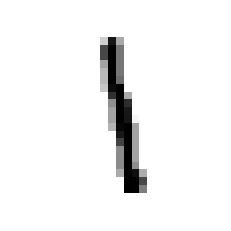

该图片真实值： [1]
该图片预测后的结果： [0.22688206]


In [53]:
number_index= 1110    # 指定任意图像编号查看预测结果
plot_digit(Xtrain[:,number_index].transpose())
print("该图片真实值：",ytrain[:,number_index]+1)
print("该图片预测后的结果：",
      sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.001})[:,number_index])

第二次训练，设置学习率为0.005，迭代次数为500次

In [54]:
sess, cost_history2 = run_logistic_model(learning_r = 0.005, 
                                training_epochs = 500, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True) 

Reached epoch 0 cost J = 0.685846
Reached epoch 50 cost J = 0.455447
Reached epoch 100 cost J = 0.348575
Reached epoch 150 cost J = 0.288225
Reached epoch 200 cost J = 0.249479
Reached epoch 250 cost J = 0.222347
Reached epoch 300 cost J = 0.202165
Reached epoch 350 cost J = 0.186482
Reached epoch 400 cost J = 0.173888
Reached epoch 450 cost J = 0.163515
Reached epoch 500 cost J = 0.154798


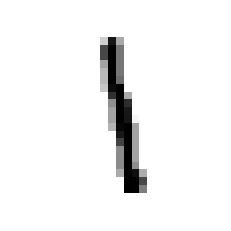

该图片真实值： [1]
该图片预测后的结果： [0.2044488]


In [55]:
number_index=1110       # 指定任意图像编号查看预测结果
plot_digit(Xtrain[:,number_index].transpose())
print("该图片真实值：",ytrain[:,number_index]+1)
print("该图片预测后的结果：",
      sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.001})[:,number_index])

#### 5.4 绘制代价函数值和迭代周期关系曲线图

<Figure size 432x288 with 0 Axes>

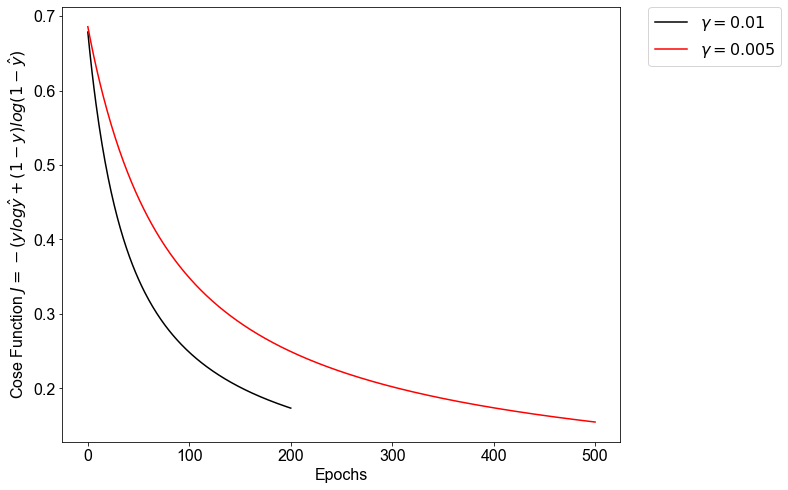

In [56]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history1, ls='solid', color = 'black', label = '$\gamma = 0.01$')
ax.plot(cost_history2, ls='solid', color = 'red', label = '$\gamma = 0.005$')
ax.set_xlabel('Epochs', fontsize = 16)
ax.set_ylabel('Cose Function $J=-(ylog\hat{y}+(1-y)log(1-\hat{y})$', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

**提示** 可通过增加迭代次数提高模型准确率，训练时间也会增加

第三次训练，设置学习率为0.001，迭代次数为1500次

In [57]:
sess, cost_history = run_logistic_model(learning_r = 1e-3, 
                                training_epochs = 1500, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.691680
Reached epoch 50 cost J = 0.626086
Reached epoch 100 cost J = 0.572610
Reached epoch 150 cost J = 0.528076
Reached epoch 200 cost J = 0.490451
Reached epoch 250 cost J = 0.458313
Reached epoch 300 cost J = 0.430607
Reached epoch 350 cost J = 0.406521
Reached epoch 400 cost J = 0.385421
Reached epoch 450 cost J = 0.366804
Reached epoch 500 cost J = 0.350268
Reached epoch 550 cost J = 0.335488
Reached epoch 600 cost J = 0.322202
Reached epoch 650 cost J = 0.310195
Reached epoch 700 cost J = 0.299291
Reached epoch 750 cost J = 0.289342
Reached epoch 800 cost J = 0.280227
Reached epoch 850 cost J = 0.271843
Reached epoch 900 cost J = 0.264104
Reached epoch 950 cost J = 0.256936
Reached epoch 1000 cost J = 0.250276
Reached epoch 1050 cost J = 0.244071
Reached epoch 1100 cost J = 0.238274
Reached epoch 1150 cost J = 0.232844
Reached epoch 1200 cost J = 0.227746
Reached epoch 1250 cost J = 0.222949
Reached epoch 1300 cost J = 0.218427
Reached epoch 1350 cost 

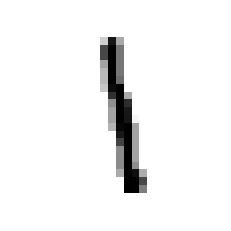

该图片真实值： [1]
该图片预测后的结果： [0.25781834]


In [58]:
number_index=1110       # 指定任意图像编号查看预测结果
plot_digit(Xtrain[:,number_index].transpose())
print("该图片真实值：",ytrain[:,number_index]+1)
print("该图片预测后的结果：",
      sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.001})[:,number_index])

#### 6 模型评估

- 定义用于精度计算的计算节点，查看训练针对训练集的手写数字识别精度  
- 对样本*i*分类是这样计算的：  
如果$P(y^{(i)}=1|x^{(i)})<0.5$，则样本属于类别0（即手写数字图像为1）  
如果$P(y^{(i)}=1|x^{(i)})>0.5$，则样本属于类别1（即手写数字图像为2）    

In [59]:
# 计算预测准确率
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))

accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

print(sess.run(accuracy1, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

0.97031105


- 绘制代价函数值和迭代周期关系曲线图

<Figure size 432x288 with 0 Axes>

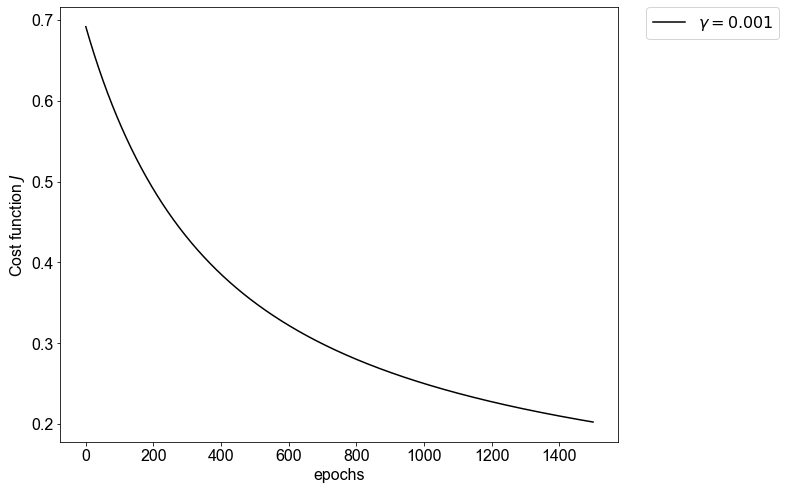

In [60]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history, ls='solid', color = 'black', label = '$\gamma = 0.001$')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

- 实际预测情况

In [61]:
print(sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))
print(sess.run(tf.greater(y_, 0.5), feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))
print(sess.run(tf.less(y_, 0.5), feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

[[0.12463376 0.91858256 0.30993202 ... 0.8455507  0.95689017 0.21486881]]
[[False  True False ...  True  True False]]
[[ True False  True ... False False  True]]


## 二、炼丹爆炉 ——  Scikit-Learn库函数调用法

### 1. scikit-learn逻辑回归

-  LogisticRegression ：手动指定一个正则化系数
- LogisticRegressionCV ：使用了交叉验证来选择正则化系数C
- logistic_regression_path ：拟合数据后，不能直接来做预测，只能为拟合数据选择合适逻辑回归的系数和正则化系数
- URL:http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### 2. 手写数字识别

In [62]:
# 导入库
from sklearn.linear_model import LogisticRegression

In [63]:
# 定义函数
logistic = LogisticRegression()

In [64]:
# 准备数据
XX = Xtrain.T     
YY = ytrain.T.ravel()

In [65]:
# 训练模型
logistic.fit(XX,YY)

LogisticRegression()

In [68]:
# 查看精度
sum(logistic.predict(XX) == YY) / len(XX)

0.9966226830034559